In [66]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Import Dataset

In [67]:
dataset = pd.read_csv("divvytrips.csv")
dataset.head()

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,trip_id
0,3/31/2017 23:59:07,4/1/2017 00:13:24,5292.0,857.0,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,Subscriber,Male,1989.0,13518905.0
1,3/31/2017 23:56:25,4/1/2017 00:00:21,4408.0,236.0,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,Subscriber,Male,1990.0,13518904.0
2,3/31/2017 23:55:33,4/1/2017 00:01:21,696.0,348.0,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,Subscriber,Female,1979.0,13518903.0
3,3/31/2017 23:54:46,3/31/2017 23:59:34,4915.0,288.0,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,Subscriber,Male,1985.0,13518902.0
4,3/31/2017 23:53:33,4/1/2017 00:00:28,4247.0,415.0,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,13518901.0


## Detect and Delete Missing Values

In [68]:
sum(dataset.isnull().values.ravel())

633550

In [69]:
dataset.info()
#gender and birthyear have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551505 entries, 0 to 1551504
Data columns (total 12 columns):
start_time           1551505 non-null object
end_time             1551505 non-null object
bikeid               1551505 non-null float64
tripduration         1551505 non-null float64
from_station_id      1551505 non-null float64
from_station_name    1551505 non-null object
to_station_id        1551505 non-null float64
to_station_name      1551505 non-null object
usertype             1551505 non-null object
gender               1234638 non-null object
birthyear            1234822 non-null float64
trip_id              1551505 non-null float64
dtypes: float64(6), object(6)
memory usage: 142.0+ MB


In [70]:
dataset = dataset.dropna()

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234638 entries, 0 to 1551504
Data columns (total 12 columns):
start_time           1234638 non-null object
end_time             1234638 non-null object
bikeid               1234638 non-null float64
tripduration         1234638 non-null float64
from_station_id      1234638 non-null float64
from_station_name    1234638 non-null object
to_station_id        1234638 non-null float64
to_station_name      1234638 non-null object
usertype             1234638 non-null object
gender               1234638 non-null object
birthyear            1234638 non-null float64
trip_id              1234638 non-null float64
dtypes: float64(6), object(6)
memory usage: 122.5+ MB


## Reduce Dataset to 35000 rows 

In [72]:
dataset = dataset.drop(dataset.index[range(35000,1234638)])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 0 to 39165
Data columns (total 12 columns):
start_time           35000 non-null object
end_time             35000 non-null object
bikeid               35000 non-null float64
tripduration         35000 non-null float64
from_station_id      35000 non-null float64
from_station_name    35000 non-null object
to_station_id        35000 non-null float64
to_station_name      35000 non-null object
usertype             35000 non-null object
gender               35000 non-null object
birthyear            35000 non-null float64
trip_id              35000 non-null float64
dtypes: float64(6), object(6)
memory usage: 3.5+ MB


## Graph 1: Birth Year Frequency Distribution

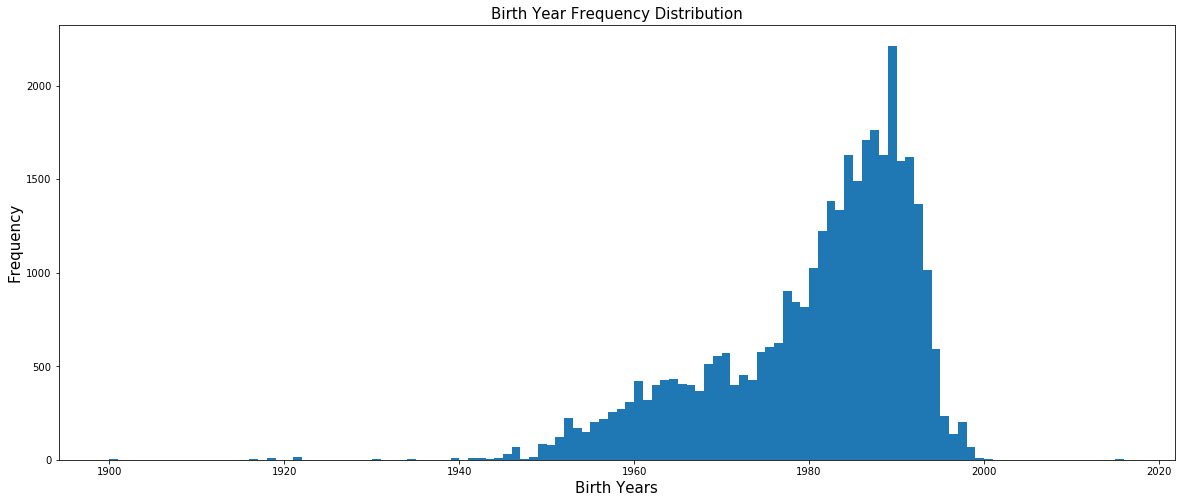

In [73]:
plt.subplots(figsize=(20,8))
plt.hist(dataset['birthyear'], bins=np.arange(dataset['birthyear'].min(), dataset['birthyear'].max()+1))
plt.title('Birth Year Frequency Distribution',size=15)
plt.xlabel('Birth Years', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

## Graph 2: Male to Female Ratio Pie Chart

In [74]:
sums = dataset.gender.groupby(dataset.gender).count()

In [75]:
sums

gender
Female     7293
Male      27707
Name: gender, dtype: int64

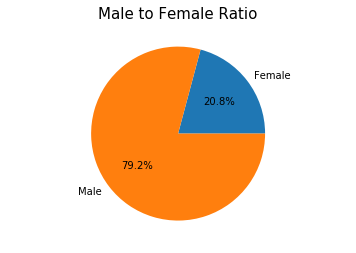

In [76]:
plt.axis('equal');
plt.pie(sums, labels=sums.index, autopct='%1.1f%%')
plt.title('Male to Female Ratio',size=15)
plt.show()

## Graph 3: Genderwise Average Trip Duration

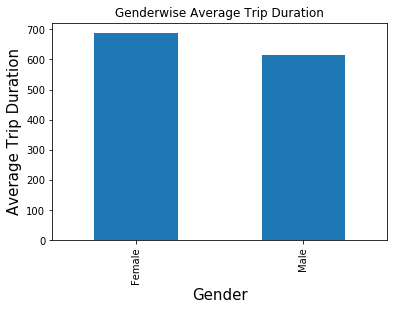

In [77]:
avgdist = dataset['tripduration'].groupby(dataset.gender).aggregate(np.mean).plot('bar')
plt.title('Genderwise Average Trip Duration')
plt.xlabel('Gender', size=15)
plt.ylabel('Average Trip Duration',size=15)
plt.xticks(size=10)
plt.show()

## Graph 4: Age Frequency Distribution

In [78]:
dataset['Age'] = 2017 - dataset['birthyear']

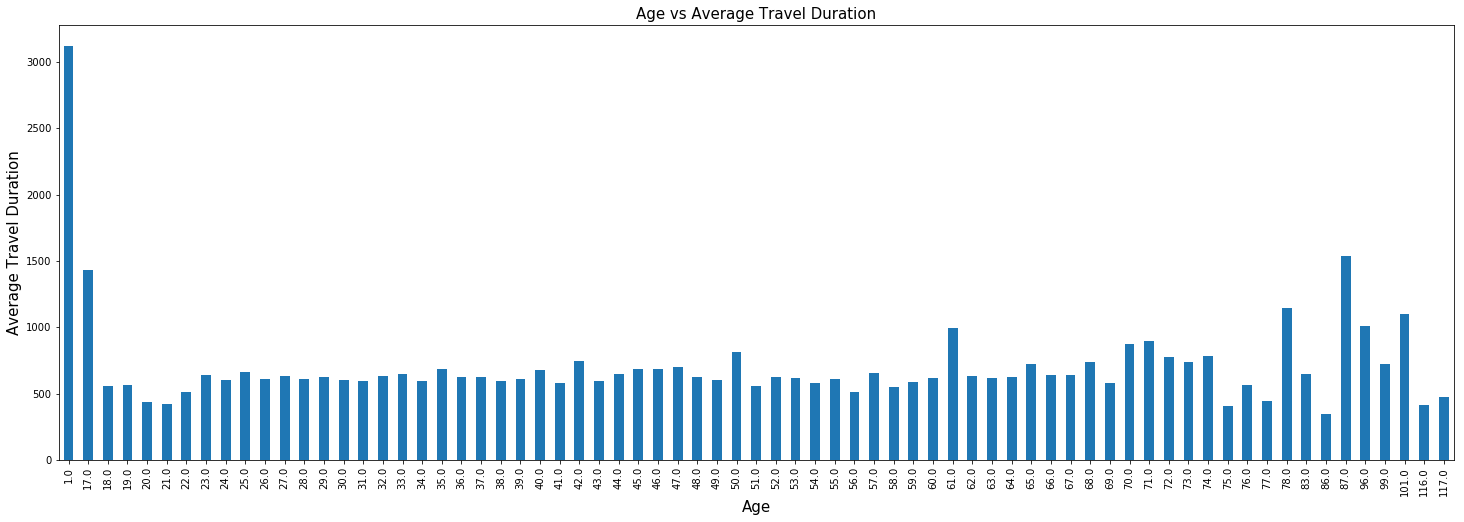

In [79]:
plt.subplots(figsize=(25,8))
agedist = dataset['tripduration'].groupby(dataset.Age).aggregate(np.mean).plot('bar')
plt.title('Age vs Average Travel Duration',size=15)
plt.xlabel('Age', size=15)
plt.ylabel('Average Travel Duration',size=15)
plt.show()

## Graph 5: Scatterplot for Tripduration

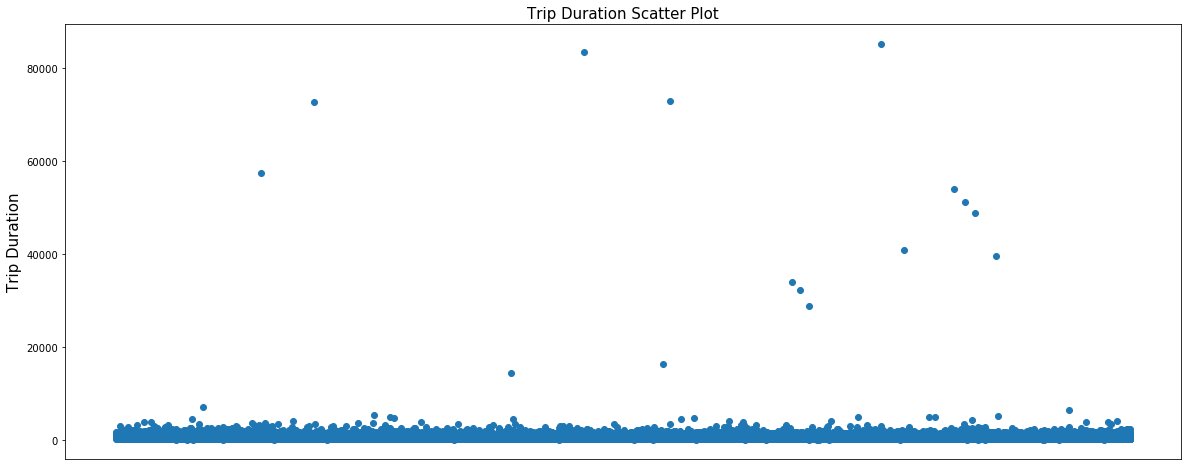

In [80]:
plt.subplots(figsize=(20,8))
plt.scatter(dataset['trip_id'],dataset['tripduration'])
plt.xticks([])
plt.ylabel('Trip Duration',size=15)
plt.title('Trip Duration Scatter Plot',size=15)
plt.show()

## Graph 6: Top 5 Destinations 

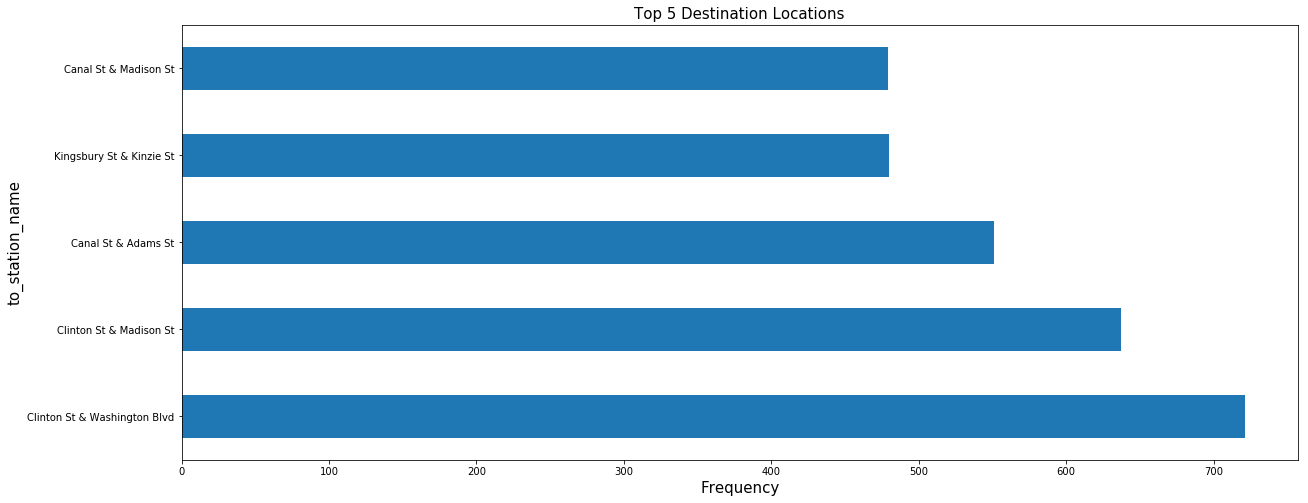

In [81]:
plt.subplots(figsize=(20,8))
sname = dataset['to_station_name'].groupby(dataset['to_station_name']).count()
sname = sname.sort_values(ascending=False)
plt.xlabel('Frequency',size=15)
plt.ylabel('Destination Station Location',size=15)
plt.title('Top 5 Destination Locations',size=15)
sname.head(5).plot('barh')
plt.show()

## Feature Engineering

### Split Date and Time

In [82]:
from dateutil.parser import parse

In [83]:
m = []
h = []
d = []

for i in dataset.start_time:
    m.append(parse(i).month)
    h.append(parse(i).hour)
    d.append(parse(i).day)

In [84]:
dataset['start_month'] = m
dataset['start_day'] = d
dataset['start_hour'] = h

In [85]:
dataset.head()

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,trip_id,Age,start_month,start_day,start_hour
0,3/31/2017 23:59:07,4/1/2017 00:13:24,5292.0,857.0,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,Subscriber,Male,1989.0,13518905.0,28.0,3,31,23
1,3/31/2017 23:56:25,4/1/2017 00:00:21,4408.0,236.0,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,Subscriber,Male,1990.0,13518904.0,27.0,3,31,23
2,3/31/2017 23:55:33,4/1/2017 00:01:21,696.0,348.0,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,Subscriber,Female,1979.0,13518903.0,38.0,3,31,23
3,3/31/2017 23:54:46,3/31/2017 23:59:34,4915.0,288.0,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,Subscriber,Male,1985.0,13518902.0,32.0,3,31,23
4,3/31/2017 23:53:33,4/1/2017 00:00:28,4247.0,415.0,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,13518901.0,28.0,3,31,23


### Non-numerical to Numerical Data

In [86]:
#Function to convert Non-numerical to Numerical Data

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {} 
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x = x + 1
            
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

df = dataset
df = handle_non_numerical_data(df)

In [87]:
df.head()

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,trip_id,Age,start_month,start_day,start_hour
0,4166,17098,5292.0,857.0,66.0,117,171.0,259,1,1,1989.0,13518905.0,28.0,3,31,23
1,23153,30559,4408.0,236.0,199.0,158,26.0,284,1,1,1990.0,13518904.0,27.0,3,31,23
2,23668,17061,696.0,348.0,520.0,196,432.0,368,1,0,1979.0,13518903.0,38.0,3,31,23
3,11105,14288,4915.0,288.0,110.0,53,142.0,198,1,1,1985.0,13518902.0,32.0,3,31,23
4,955,19219,4247.0,415.0,327.0,447,331.0,366,1,0,1989.0,13518901.0,28.0,3,31,23


In [88]:
x = df.drop(['tripduration','end_time','birthyear','trip_id','from_station_name','to_station_name','start_time','bikeid'], axis=1)
y = df.tripduration

In [89]:
x.head()

,from_station_id,to_station_id,usertype,gender,Age,start_month,start_day,start_hour
0,66.0,171.0,1,1,28.0,3,31,23
1,199.0,26.0,1,1,27.0,3,31,23
2,520.0,432.0,1,0,38.0,3,31,23
3,110.0,142.0,1,1,32.0,3,31,23
4,327.0,331.0,1,0,28.0,3,31,23


In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=123)

## Write CSV File

In [92]:
df.to_csv('finaldata.csv')

## Random Forest Regressor

In [93]:
rm_model = RandomForestRegressor()

In [94]:
rm_model.fit(x_train,y_train)
y_pred = rm_model.predict(x_test)

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: ", mean_squared_error(y_test,y_pred))
print("\nMAE: ", mean_absolute_error(y_test,y_pred))

MSE:  1947893.61267

MAE:  297.685804354


## Feature Importance and Selection

                 importance
feature                    
start_day              23.2
Age                    23.1
to_station_id          21.5
from_station_id        17.3
start_hour             13.7
gender                  1.1
usertype                0.0
start_month             0.0 %


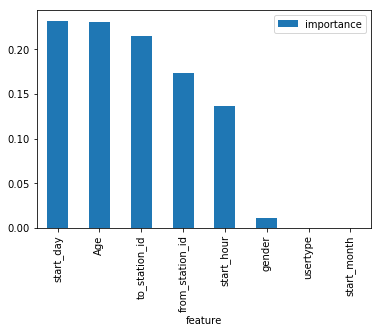

In [96]:
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rm_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print(importances*100,"%")
importances.plot.bar()

In [97]:
#Eliminating User Type and Start Month
x = x.drop(['usertype','start_month'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)

## OOB SCORE v/s Number of Estimators

In [98]:
from sklearn.ensemble import RandomForestRegressor as RFR
n_estimators = [10,20,50,80,100,200]
oob_errors = []
for n in n_estimators:
    ranfor = RFR(n_estimators=n, criterion="mse", min_samples_split=2, min_samples_leaf=1,
                      max_features="auto", bootstrap=True, oob_score=True, random_state=123, verbose=1)
    ranfor.fit(x_train,y_train)
    y_pred = ranfor.predict(x_test)
    oob_errors.append(ranfor.oob_score_)
    
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("OOB Error: ", oob_errors)
print("\n MAE: ", mean_absolute_error(y_test,y_pred))

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
C:\Users\arnab\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.2s finished
C:\Users\arnab\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.9s finished
[Par

OOB Error:  [-0.41040924861126826, -0.18621034856140861, -0.082547789184547415, -0.079124614335852383, -0.065011667564169429, -0.046967885963783651]

 MAE:  281.302484301


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished


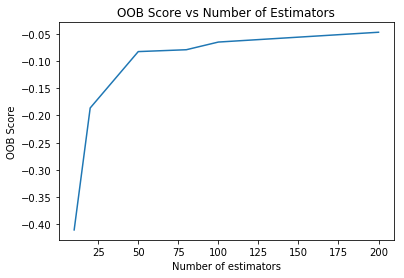

In [99]:
# Plot OOB vs n_estimators
plt.plot(n_estimators,oob_errors)
plt.title("OOB Score vs Number of Estimators")
plt.xlabel("Number of estimators")
plt.ylabel("OOB Score")
plt.show()

## GridsearchCV for RandomForestRegressor

In [100]:
from sklearn.model_selection import GridSearchCV
rm_grid = GridSearchCV(rm_model,
                   {'n_estimators':[15,35,50], 
                    'max_depth':[6,8,10], 
                    'min_samples_split':[5,6,7]}, verbose=1)

In [101]:
rm_grid.fit(x_train,y_train)
print(rm_grid.best_score_)
print(rm_grid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.0min finished


0.106155463453
{'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 50}


## Optimal RandomForestRegressor

In [102]:
rm_model = RandomForestRegressor(criterion = 'mse',
                                 n_estimators = 50,
                                 max_depth = 6,
                                 min_samples_split = 6,
                                 max_features = 'auto',
                                 random_state = 123,
                                 bootstrap=True, 
                                 oob_score=True)

rm_model.fit(x_train,y_train)
y_pred = rm_model.predict(x_test)

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: ", mean_squared_error(y_test,y_pred))
print("\nMAE: ", mean_absolute_error(y_test,y_pred))

MSE:  1455763.6937

MAE:  325.678527106
